**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

** HOG feature extraction and values **

Read the images for cars and not cars (see code: vechile_tracking.py, line: 38-47). Then extract the hog features for all the car and notcar images and generate the feature vectors respectively. I used the below parameter for the HOG features:
color_space = 'YCrCb'
orientation = 9
pix_per_cell = 8
hog_channel = 'ALL'
spatial_size = (32, 32)
hist_bins = 16

I tried several HOG options including color_space and above are the ones that gave the best results. Below shown are images with hog features for car and noncar images

Code for feature_extraction (see code: vechile_tracking.py, line: 49-61, lesson_functions.py, line: 49-97)

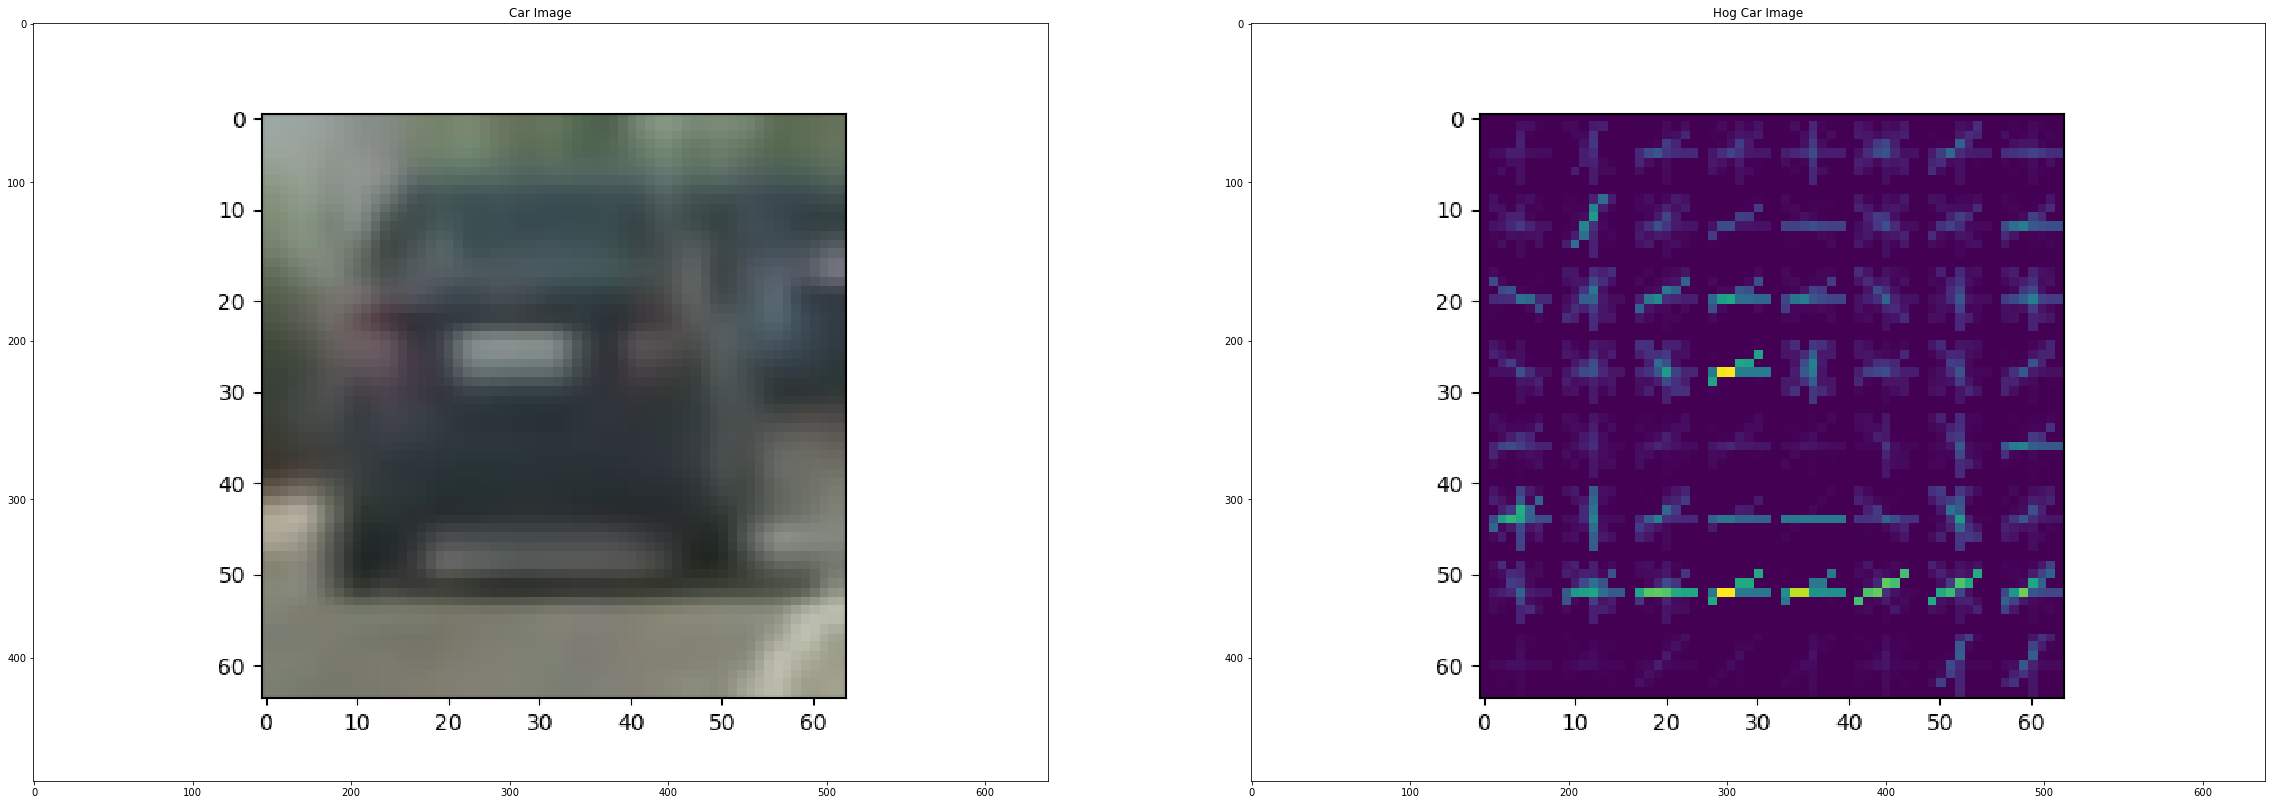

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
%matplotlib inline

plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
plt.title("Car Image")
image = Image.open("output_images/car.png")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Hog Car Image")
image = Image.open("output_images/car_hog.png")
plt.imshow(image)

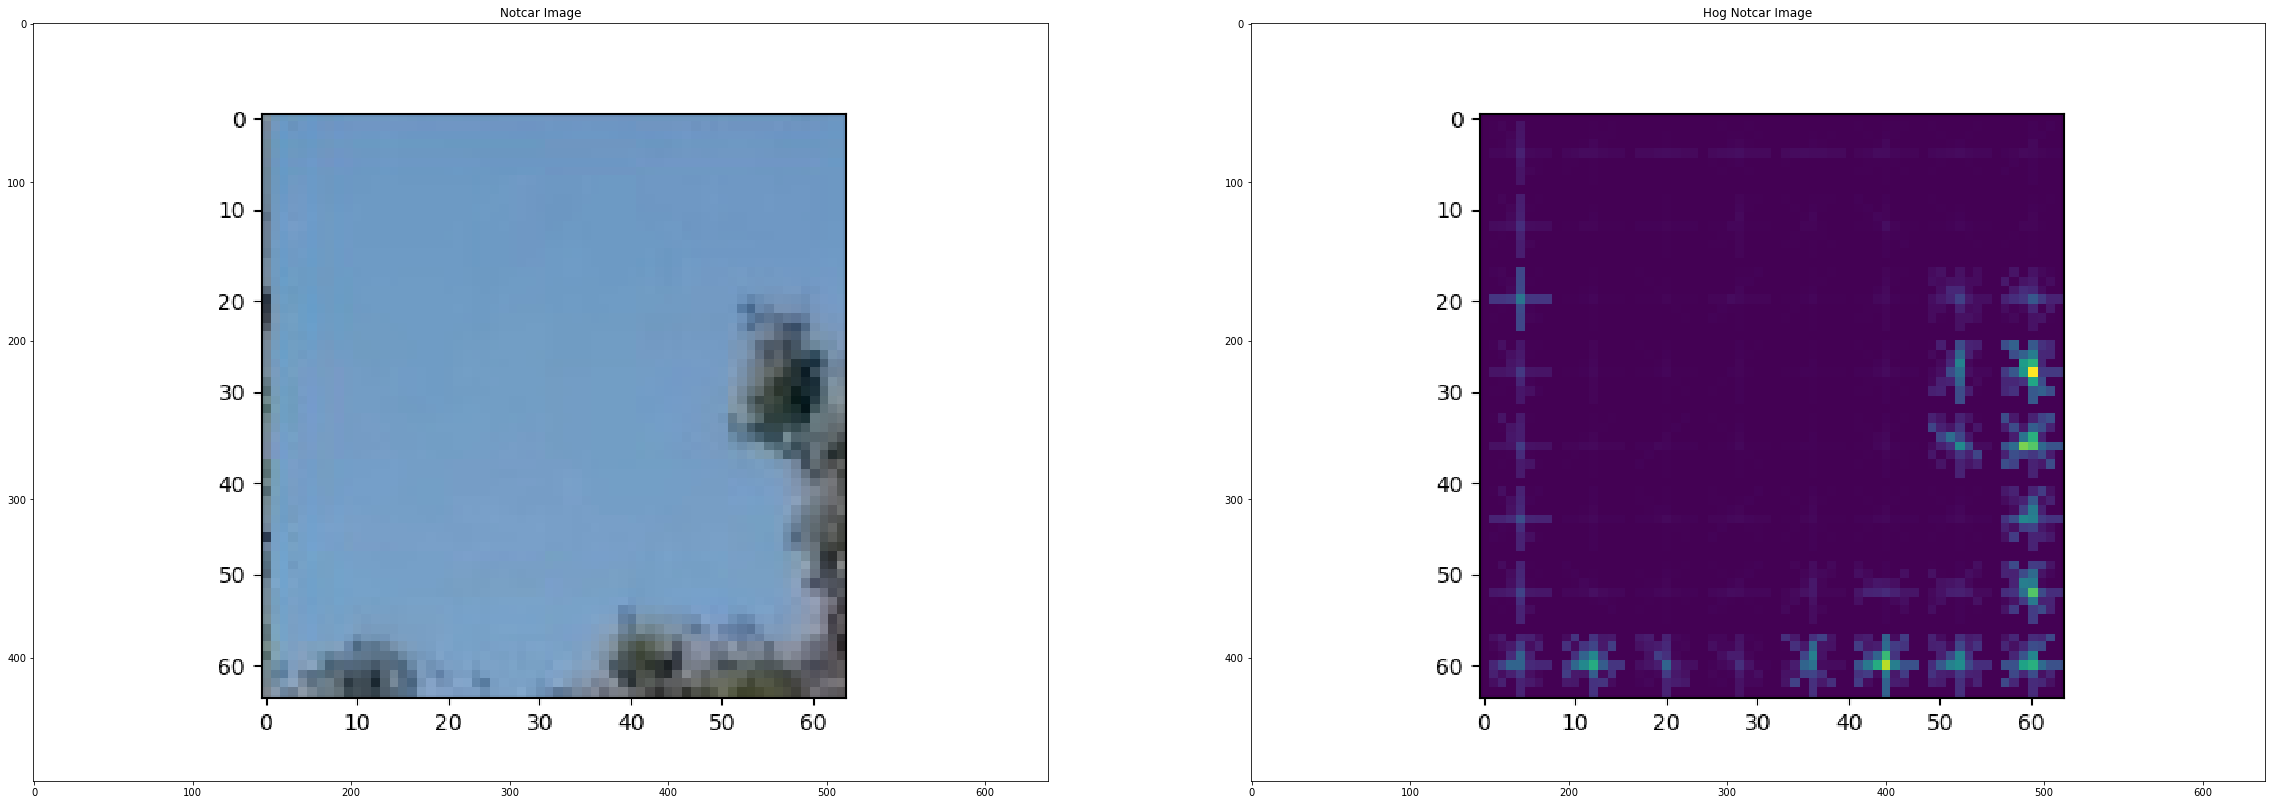

In [2]:
plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
plt.title("Notcar Image")
image = Image.open("output_images/notcar.png")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Hog Notcar Image")
image = Image.open("output_images/notcar_hog.png")
plt.imshow(image)

** SVM Training and Classification **

First normalize the computed features using Standard Scalar. Split the data into training and test set in the ratio of 0.8, 0.2 respectively. Used the SVM Linear classifer to train the model and testing accuracy of the model was close to ~98.9%. The lines of code for this part is in vechile_tracking.py, lines: 85-107

** Sliding Window Search **

Used sliding window method to detect and track the cars on the road. I used three different size windows to serach for cars of different sizes, namely 64x64, 96x96, 128x128. Also I restricted to serach location to slightly lesser than half the image size (i.e. y axis) and then restricted on the x-axis to the only one direction of lanes. I used an overlap of 0.8 after several trials and this worked the best within resonable amount of time.

Code for this is vechile_tracking.py, line: 155-179, lesson_functions.py, line: 103-142

** Pipeline for car detection **

The pipeline for car detection is described in the function 'process_image' (code: vechile_tracking.py, Lines: 112-139). Serach through the images and find the hot windows for different window sizes. Add these hot windows to the heat map, apply a threshold to idnetify the cars, apply label and draw the bounding boxes across this. Images are shown below the ouput of each stage

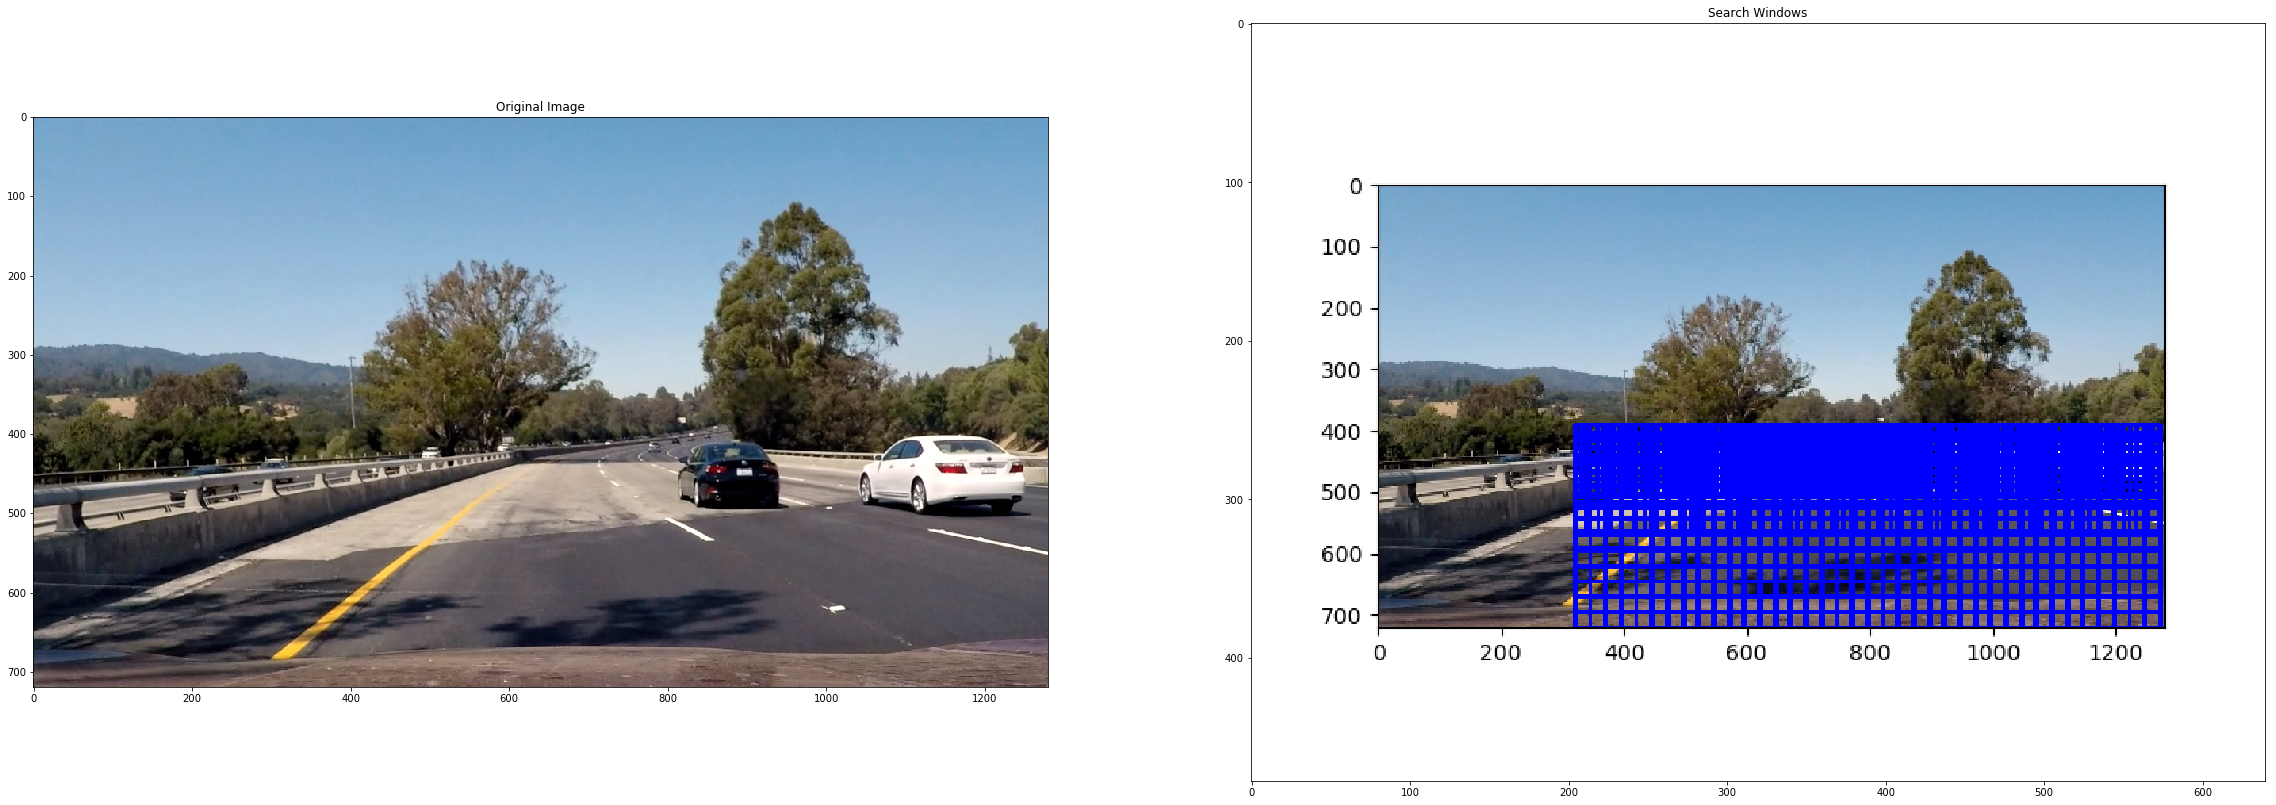

In [3]:
plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
plt.title("Original Image")
image = Image.open("test_images/test4.jpg")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Search Windows")
image = Image.open("output_images/test4_windows.png")
plt.imshow(image)

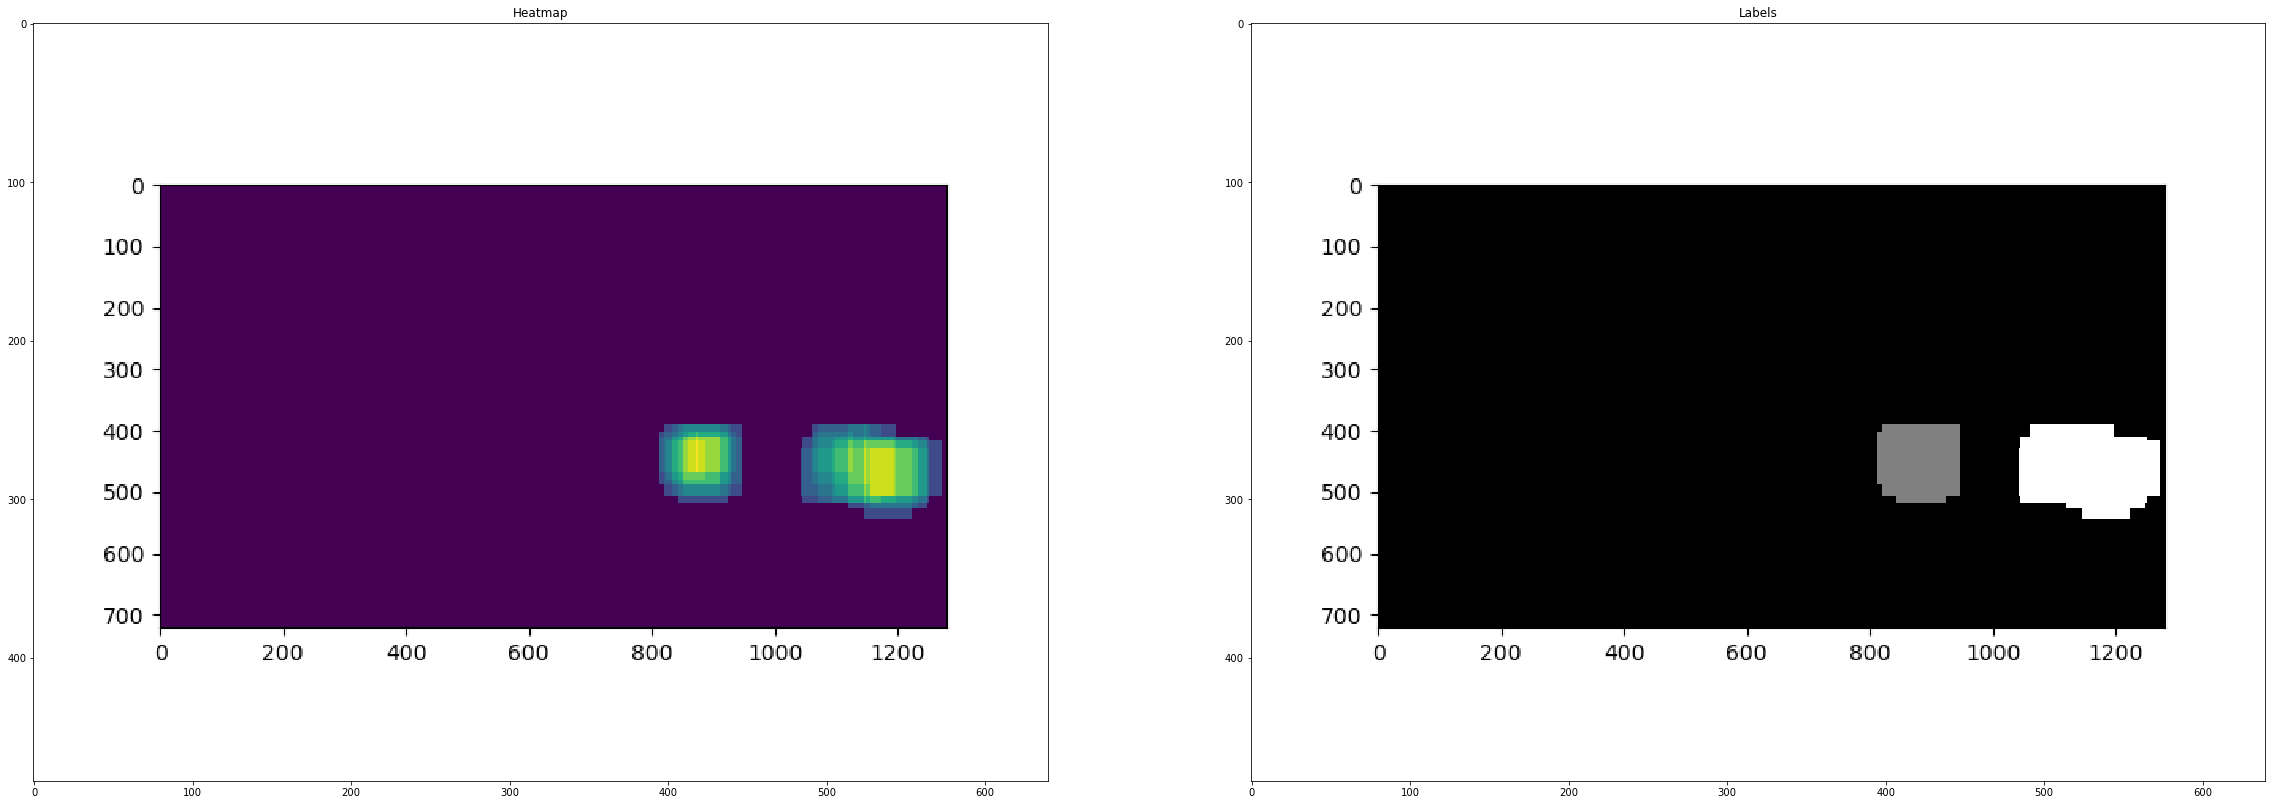

In [4]:
plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
plt.title("Heatmap")
image = Image.open("output_images/test4_heatmap.png")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Labels")
image = Image.open("output_images/test4_label.png")
plt.imshow(image)

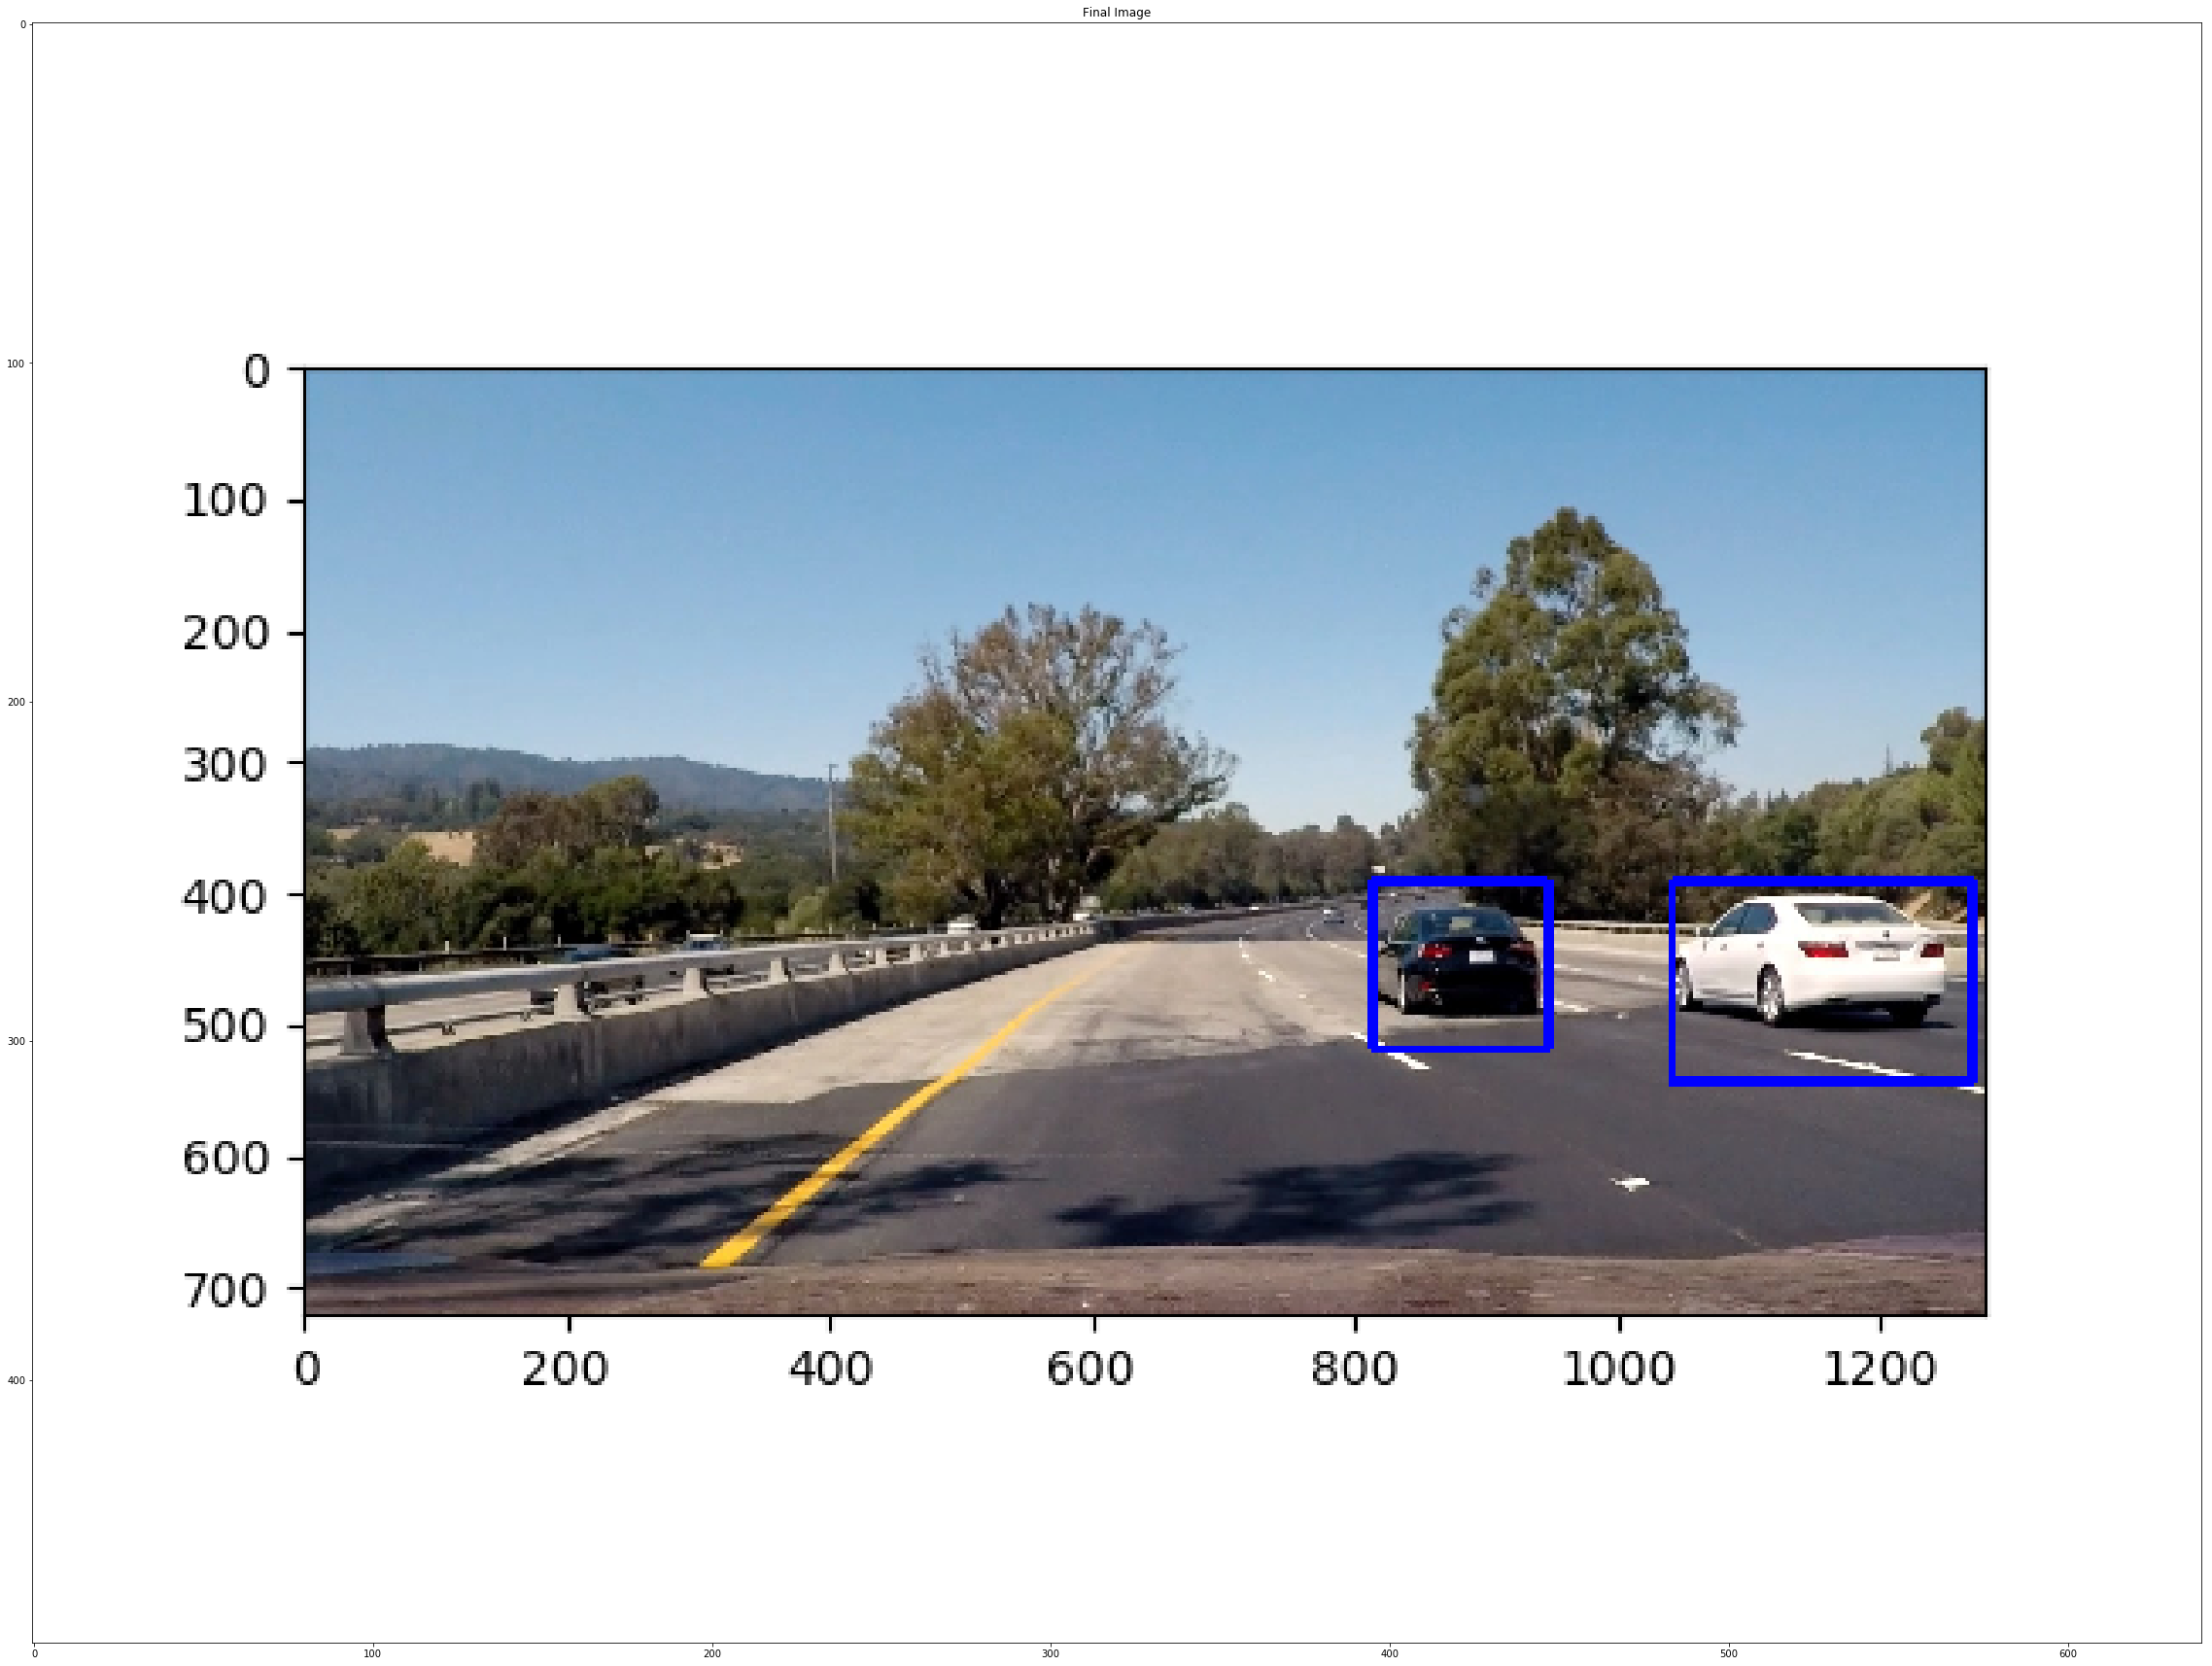

In [5]:
plt.figure(figsize=(40, 40))
plt.subplot(1, 1, 1)
plt.title("Final Image")
image = Image.open("output_images/test4_final.png")
plt.imshow(image)

** Video Implementation **

In [6]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format("project_video_output_working.mp4"))

** Filtering for False positives **

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Code: vechile_tracking.py, Line: 126 - 139

** Discussion **

The alogorithm may fail for for some smaller car sizes, or extremely large cars/trucks, etc. Which are larger than sliding window sizes. The algorithm may fail in extreme weather conditions, where cars are covered by snow, etc.  Two cars are identified as only 1 car, if they are passing each other.